In [2]:
%run correlate_evolution.ipynb

%cd /work/clusterEvo/new_tests/

/work/clusterEvo/new_tests


In [3]:
import multiprocessing
import itertools
import pandas as pd
import plotly
from scipy.stats import pearsonr

In [4]:
datasets = {}
for n in range(1, 11):
    print(n)
    with cd(f'set{n}/'):
        alignment_file_names = [f'alignments/tree_{_}.phy' for _ in range(1, 51)]

        pool          = multiprocessing.Pool(processes = 10)
        dist_matrices = pool.map(run_dist_matrix, alignment_file_names)

    regressions, r2s = [], []
    for matrix1, matrix2 in itertools.combinations(dist_matrices, 2):
        tmp_reg, tmp_r2 = assess_coevolution(matrix1, matrix2, geneIDs=False)
        regressions.append(tmp_reg)
        r2s.append(tmp_r2)

    with cd(f'set{n}/'):
        geo_matrix              = pd.read_csv('geodesic_distances.csv', index_col=0)
        condensed_geo_distances = squareform(geo_matrix)

        rf_matrix              = pd.read_csv('rf_distances.csv', index_col=0)
        condensed_rf_distances = squareform(rf_matrix)
    
    datasets[f'set{n}'] = {'regression':regressions,
                           'r2'        :r2s,
                           'geodesic'  :condensed_geo_distances,
                           'rf'        :condensed_rf_distances}

1
2
3
4
5
6
7
8
9
10


In [5]:
spr_distances  = pd.DataFrame(index  =['tree_%i' % num for num in range(1, 51)],
                              columns=['tree_%i' % num for num in range(1, 51)],
                              data   =[abs(np.arange(50)-n) for n in range(50)])
condensed_spr_distances = squareform(spr_distances)
spr_distances.head()

tree_1  tree_2  tree_3  tree_4  tree_5  tree_6  tree_7  tree_8  \
tree_1       0       1       2       3       4       5       6       7   
tree_2       1       0       1       2       3       4       5       6   
tree_3       2       1       0       1       2       3       4       5   
tree_4       3       2       1       0       1       2       3       4   
tree_5       4       3       2       1       0       1       2       3   

        tree_9  tree_10  ...  tree_41  tree_42  tree_43  tree_44  tree_45  \
tree_1       8        9  ...       40       41       42       43       44   
tree_2       7        8  ...       39       40       41       42       43   
tree_3       6        7  ...       38       39       40       41       42   
tree_4       5        6  ...       37       38       39       40       41   
tree_5       4        5  ...       36       37       38       39       40   

        tree_46  tree_47  tree_48  tree_49  tree_50  
tree_1       45       46       47       48       49  
tree_2       44       45       46       47       48  
tree_3       43       44       45       46       47  
tree_4       42       43       44       45       46  
tree_5       41       42       43       44       45  

[5 rows x 50 columns]

In [8]:
np.mean(pearson_values)

-0.8734961434996984

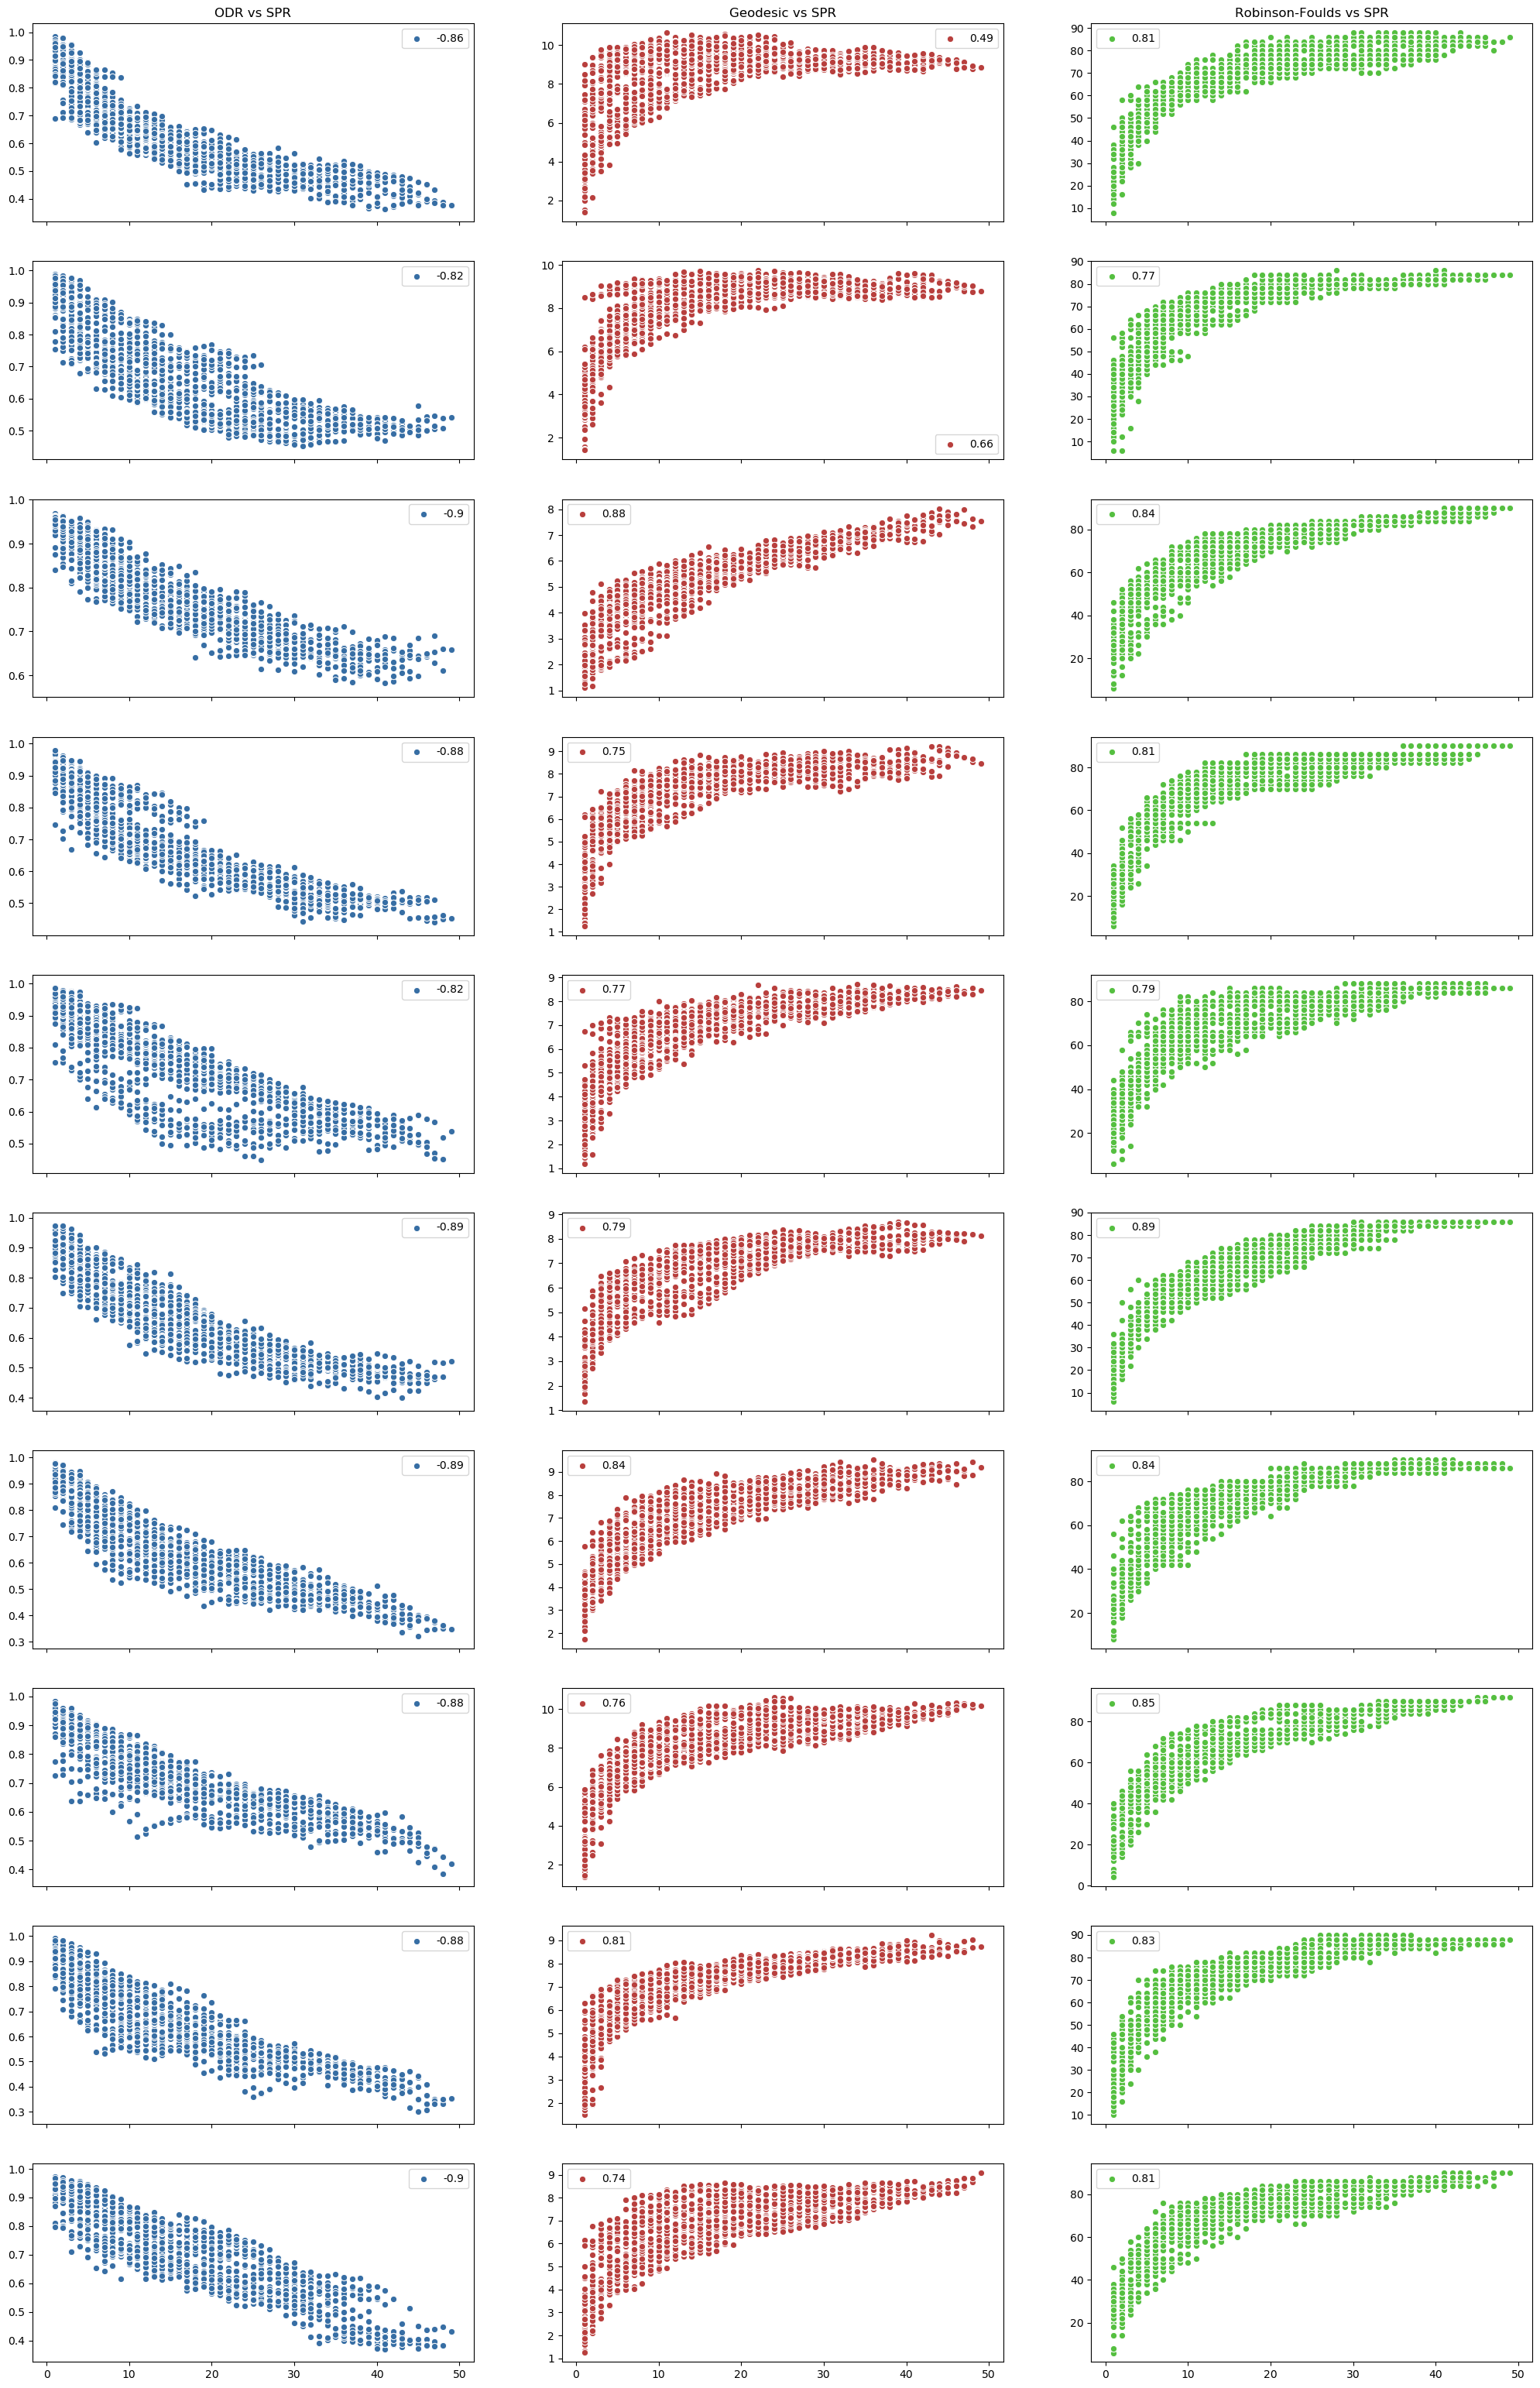

In [7]:
fig, axs = plt.subplots(nrows=10, ncols=3, sharex=True, dpi=100, figsize=(25, 40))

odr_data_concat = []
spr_data_concat = []
pearson_values = []
for ax, dataset_num in zip(axs[:, 0], range(1, 11)):
    odr_data_concat.extend(datasets[f'set{dataset_num}']['r2'])
    spr_data_concat.extend( condensed_spr_distances.tolist() )
    sns.scatterplot(condensed_spr_distances,
                    datasets[f'set{dataset_num}']['r2'],
                    ax=ax,
                    color='#376EA4',
#                     alpha=0.5,
                    label=round(pearsonr(condensed_spr_distances, 
                                         datasets[f'set{dataset_num}']['r2'])[0],
                                2))
    pearson_values.append(
        pearsonr(condensed_spr_distances, datasets[f'set{dataset_num}']['r2'])[0]
    )

geo_data_concat = []
for ax, dataset_num in zip(axs[:, 1], range(1, 11)):
    geo_data_concat.extend( datasets[f'set{dataset_num}']['geodesic'] )
    sns.scatterplot(condensed_spr_distances,
                    datasets[f'set{dataset_num}']['geodesic'],
                    ax=ax,
                    color='#B83F3D',
#                     alpha=0.5,
                    label=round(pearsonr(condensed_spr_distances, 
                                         datasets[f'set{dataset_num}']['geodesic'])[0],
                                2))
    
rf_data_concat = []
for ax, dataset_num in zip(axs[:, 2], range(1, 11)):
    rf_data_concat.extend( datasets[f'set{dataset_num}']['rf'] )
    sns.scatterplot(condensed_spr_distances,
                    datasets[f'set{dataset_num}']['rf'],
                    ax=ax,
                    color='#55BF40',
#                     alpha=0.5,
                    label=round(pearsonr(condensed_spr_distances, 
                                         datasets[f'set{dataset_num}']['rf'])[0],
                                2))

axs[0, 0].set_title('ODR vs SPR');
# axs[0, 1].set_title('MSE vs SPR');
axs[0, 1].set_title('Geodesic vs SPR');
axs[0, 2].set_title('Robinson-Foulds vs SPR');

In [15]:
ax.annotate?

Signature: ax.annotate(s, xy, *args, **kwargs)
Docstring:
Annotate the point *xy* with text *text*.

In the simplest form, the text is placed at *xy*.

Optionally, the text can be displayed in another position *xytext*.
An arrow pointing from the text to the annotated point *xy* can then
be added by defining *arrowprops*.

Parameters
----------
text : str
    The text of the annotation.  *s* is a deprecated synonym for this
    parameter.

xy : (float, float)
    The point *(x,y)* to annotate.

xytext : (float, float), optional
    The position *(x,y)* to place the text at.
    If *None*, defaults to *xy*.

xycoords : str, `.Artist`, `.Transform`, callable or tuple, optional

    The coordinate system that *xy* is given in. The following types
    of values are supported:

    - One of the following strings:

      =================   =============================================
      Value               Description
      =================   ===========================================

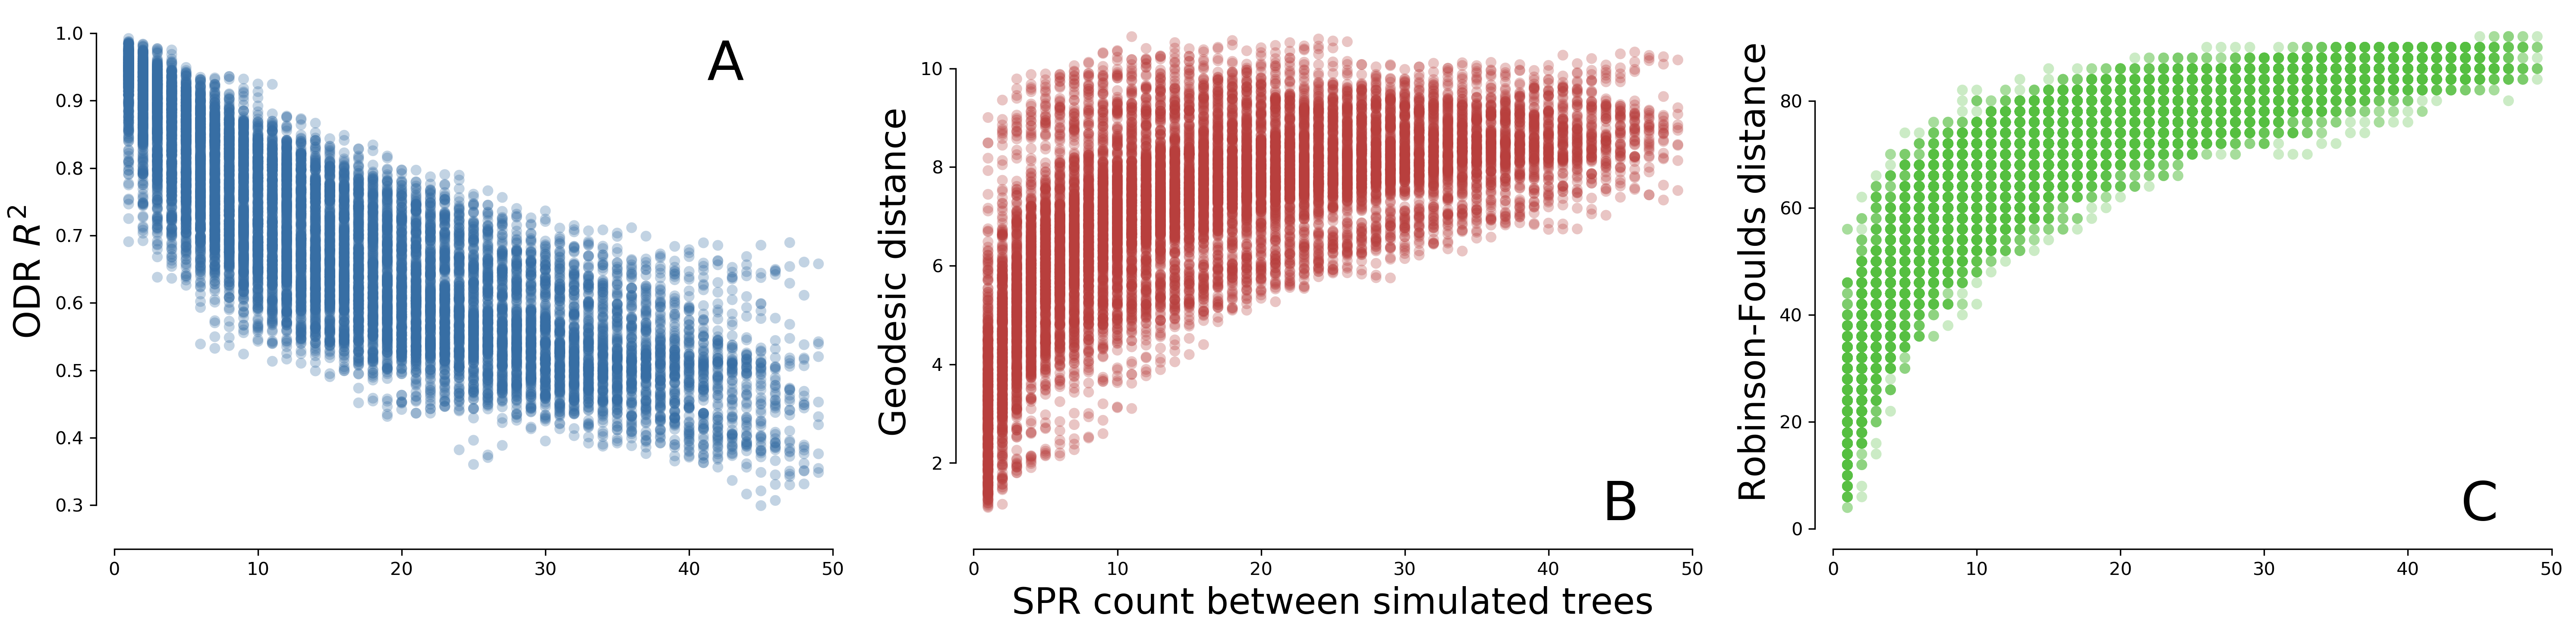

In [25]:
fig, axs = plt.subplots(ncols=3, sharex=True, dpi=300, figsize=(20, 5))

sns.scatterplot(spr_data_concat, odr_data_concat, 
                alpha=0.3, 
                color='#376EA4', 
                edgecolor='none', 
                ax=axs[0])
axs[0].set_ylabel('ODR $R^2$', fontdict={'size':20});
axs[0].set_xlim(0, 50)
axs[0].annotate('A', 
                xy=(0.85,0.9),
                xycoords='axes fraction', 
                fontsize=30,
                ha='center', 
                va='center')

sns.scatterplot(spr_data_concat, geo_data_concat, 
                alpha=0.3, 
                color='#B83F3D', 
                edgecolor='none', 
                ax=axs[1])
axs[1].set_ylabel('Geodesic distance', fontdict={'size':20});
axs[1].set_xlabel('SPR count between simulated trees', fontdict={'size':20})
axs[1].annotate('B', 
                xy=(0.9,0.05),
                xycoords='axes fraction', 
                fontsize=30,
                ha='center', 
                va='center')


sns.scatterplot(spr_data_concat, rf_data_concat, 
                alpha=0.3, 
                color='#55BF40', 
                edgecolor='none', 
                ax=axs[2])
axs[2].set_ylabel('Robinson-Foulds distance', fontdict={'size':20});
axs[2].annotate('C', 
                xy=(0.9,0.05),
                xycoords='axes fraction', 
                fontsize=30,
                ha='center', 
                va='center')


sns.despine(offset=10, trim=True);
fig.tight_layout()

fig.savefig('/Users/thiberio/Dropbox (MIT)/regression_paper/figure/simulation_results.pdf')